In [1]:
#importing lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing data
df = pd.read_csv('D:\Datasets\GlobalPowerPlants\global_power_plant_database.csv')

C:\Users\Laptop Solutions\AppData\Local\Temp\ipykernel_20792\2611083617.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\Datasets\GlobalPowerPlants\global_power_plant_database.csv')


In [4]:
#checking top rows of the table
df.head()

#checking for nulls
df.isnull().sum()

#findings duplicates
df.duplicated().sum()

#dropping duplicates
df.drop_duplicates(inplace=True)

np.int64(0)

In [ ]:
df.describe() #summary statistics

df.info() #data types

df['capacity_mw'].isnull().sum() #checking for nulls in capacity_mw

In [ ]:
#correcting datatypes
df['Capacity MW'] = pd.to_numeric(df['Capacity MW'], errors='coerce')
df['Commissioning Year'] = df['Commissioning Year'].astype('category')

In [5]:
#making sure that the latitude and longitude are within the correct range
df = df[(df['latitude'] >= -90) & (df['latitude'] <= 90)]
df = df[(df['longitude'] >= -180) & (df['longitude'] <= 180)]


In [11]:
#checking unique fuel types for powerplants
unique_values = df['primary_fuel'].unique()
unique_values

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [ ]:
#countries with most power plants
CountOfPowerPlantsByCountry = df.groupby('country_long')['name'].count().sort_values(ascending=False)
Top10CountriesWithMostPowerPlants = CountOfPowerPlantsByCountry.head(10)
Top10CountriesWithMostPowerPlants

country_long
United States of America    9833
China                       4235
United Kingdom              2751
Brazil                      2360
France                      2155
India                       1589
Germany                     1309
Canada                      1159
Spain                        829
Russia                       545
Name: name, dtype: int64

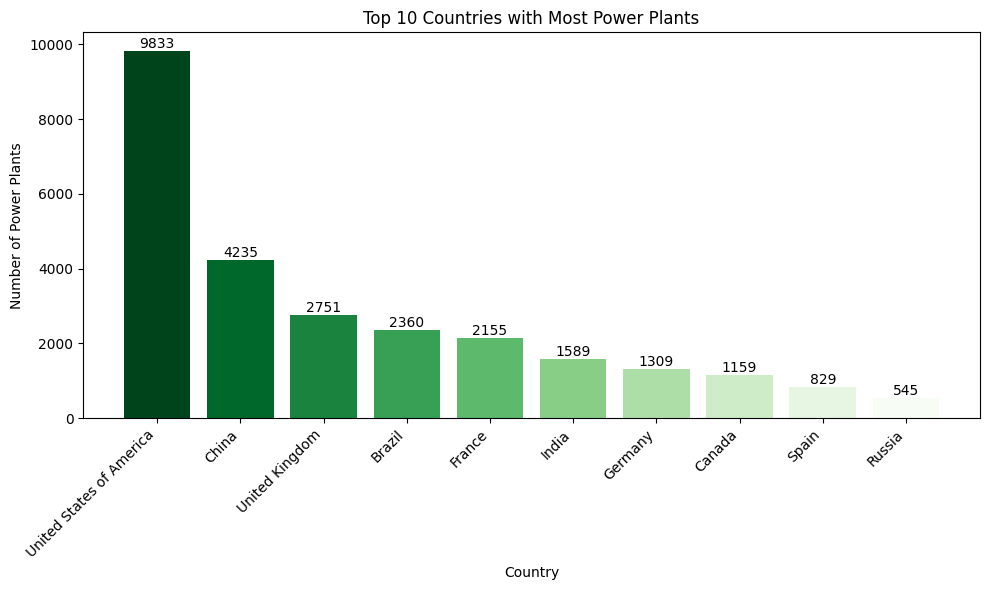

In [27]:
plt.figure(figsize=(10, 6))
bars = plt.bar(Top10CountriesWithMostPowerPlants.index, Top10CountriesWithMostPowerPlants.values,
               color=plt.cm.Greens(np.linspace(1, 0, len(Top10CountriesWithMostPowerPlants))))

#adding labels to chart
plt.xlabel('Country')
plt.ylabel('Number of Power Plants')
plt.title('Top 10 Countries with Most Power Plants')
plt.xticks(rotation=45, ha='right')

# displaying values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, str(int(yval)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [2]:
#getting top 10 countries with most power plants and sum of their capacities
power_plant_stats = df.groupby('country_long').agg(
    PlantCount=('name', 'count'),
    TotalMwCapacity=('capacity_mw', 'sum')
).sort_values(by='PlantCount', ascending=False)

Top10 = power_plant_stats.head(10)
Top10

,PlantCount,TotalMwCapacity
country_long,,
United States of America,9833,1.204638e+06
China,4235,1.415067e+06
United Kingdom,2751,9.715528e+04
Brazil,2360,1.475893e+05
France,2155,1.106159e+05
India,1589,3.160885e+05
Germany,1309,1.120404e+05
Canada,1159,1.435787e+05
Spain,829,7.903507e+04


In [ ]:
ChinesePowerPlants = df[df['country_long'] == 'China']
ChinesePowerPlants

C:\Users\Laptop Solutions\AppData\Local\Temp\ipykernel_24492\3148042315.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=fuel_distribution.index, y=fuel_distribution.values, palette="Greens_r")


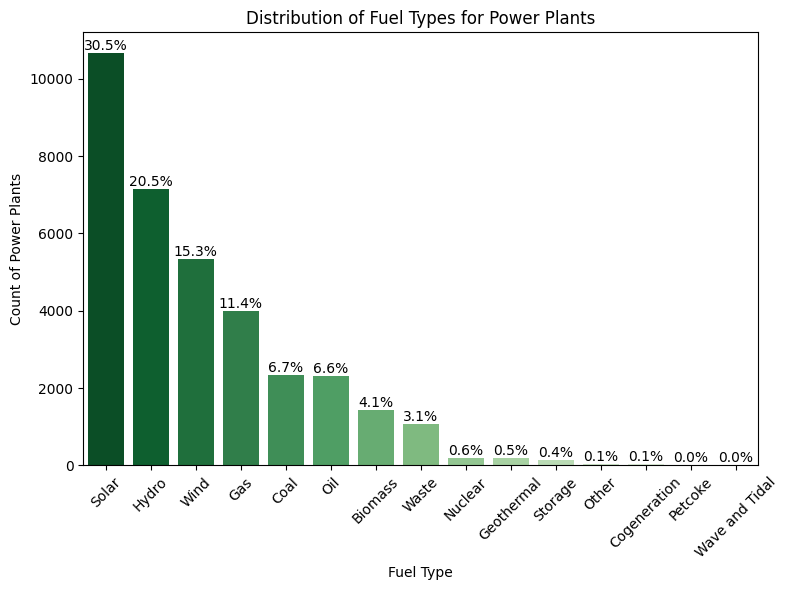

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by fuel_type and counting the occurrences
fuel_distribution = df['primary_fuel'].value_counts()

# Calculating the percentage
total_count = fuel_distribution.sum()
percentages = (fuel_distribution / total_count) * 100

# Plotting the distribution using seaborn (you can also use matplotlib)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=fuel_distribution.index, y=fuel_distribution.values, palette="Greens_r")

# Adding labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Count of Power Plants')
plt.title('Distribution of Fuel Types for Power Plants')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Adding the percentage labels on top of the bars
for p in ax.patches:
    percentage = (p.get_height() / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


In [7]:
#High capacity plants

# Calculate the 99th percentile for the 'Capacity' column
percentile_99 = df['capacity_mw'].quantile(0.99)

# Filter power plants with capacities greater than or equal to the 99th percentile
top_1_percent_plants = df[df['capacity_mw'] >= percentile_99]

top_1_percent_plants

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
355,AUS,Australia,Bayswater,AUS0000265,2640.00000,-32.3953,150.9491,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,17049.59,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
926,AZE,Azerbaijan,Azerbaijan TPP,WRI1002179,2400.00000,40.7800,46.9901,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,1260.90,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
1016,BLR,Belarus,Lukoml Thermal Power Plant Belarus,GEODB0043036,2460.00000,54.6803,29.1341,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,9961.97,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
1043,BEL,Belgium,DOEL 4,WRI1002223,2910.00000,51.3254,4.2597,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,20203.97,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
1385,BRA,Brazil,Belo Monte,BRA0030354,3327.45544,-3.1264,-51.7750,Hydro,NaN,NaN,...,17396.84,16761.09,16507.75,16552.98,15594.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34627,UZB,Uzbekistan,Syrdarya,WRI1000138,3000.00000,40.2287,69.1005,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,16746.71,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34634,VEN,Venezuela,Antonio Jose de Sucre (Macagua),WRI1018635,2930.00000,8.3039,-62.6677,Hydro,NaN,NaN,...,5439.02,5079.12,5464.95,5353.81,7634.54,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34653,VEN,Venezuela,Manuel Piar (Tocoma) Hydroelectric Power Plant...,WRI1061137,2530.00000,7.8997,-63.0322,Hydro,NaN,NaN,...,12742.80,12444.41,12444.41,12777.71,11770.09,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34668,VEN,Venezuela,Simon Bolivar (Guri),WRI1018677,8851.00000,7.7659,-62.9982,Hydro,NaN,NaN,...,44579.67,43535.76,43535.76,44701.81,41176.73,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [6]:
#Finding out the most commissioned year and count of power plants
most_commissioned_year = df['commissioning_year'].value_counts().idxmax()
most_commissioned_year

most_commissioned_count = df['commissioning_year'].value_counts().max()
most_commissioned_count

np.int64(865)

In [2]:
# Calculating the the average capacity for each fuel type
average_capacity = df.groupby('primary_fuel')['capacity_mw'].mean()
average_capacity

primary_fuel
Biomass             23.972938
Coal               843.579828
Cogeneration        98.731707
Gas                373.449375
Geothermal          67.130952
Hydro              147.171551
Nuclear           2091.855179
Oil                112.878754
Other               84.020000
Petcoke            202.048125
Solar               17.657039
Storage             12.683704
Waste               13.809657
Wave and Tidal      55.220000
Wind                49.224126
Name: capacity_mw, dtype: float64

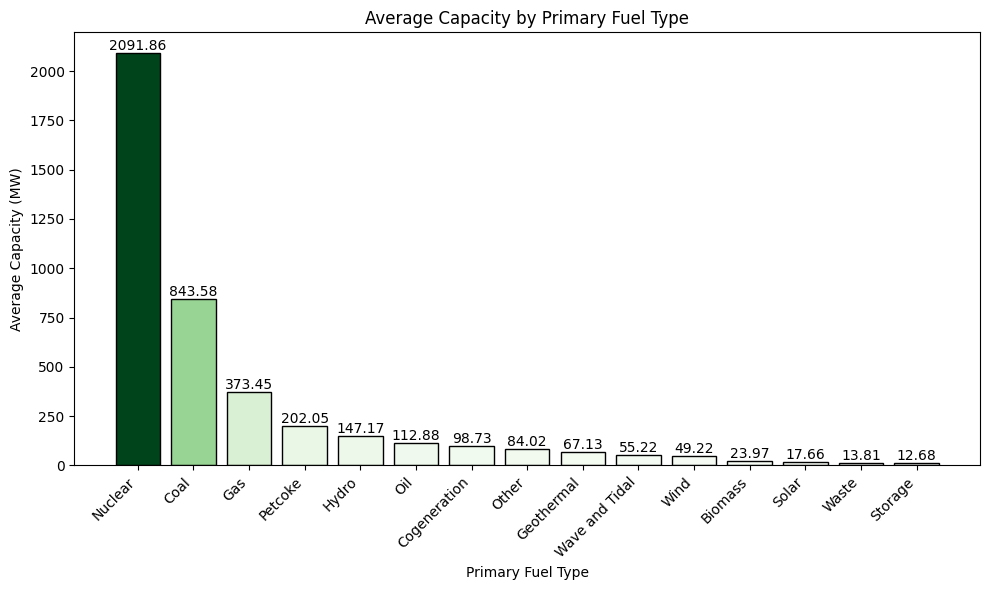

In [6]:
import matplotlib.pyplot as plt
import numpy as np

average_capacity = df.groupby('primary_fuel')['capacity_mw'].mean()

#Sort the average capacities from highest to lowest
average_capacity = average_capacity.sort_values(ascending=False)

#Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

#Normalize the values for the gradient
normalized_values = (average_capacity - average_capacity.min()) / (average_capacity.max() - average_capacity.min())

# create the green gradient colors
colors = plt.cm.Greens(normalized_values)

bars = ax.bar(average_capacity.index, average_capacity, color=colors, edgecolor='black')


ax.set_xlabel('Primary Fuel Type')
ax.set_ylabel('Average Capacity (MW)')
ax.set_title('Average Capacity by Primary Fuel Type')


for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        height,  
        f'{height:.2f}',  
        ha='center', va='bottom', fontsize=10  
    )

# rotating labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
#underperforming regions with low capacity plants.

#Grouping country name and sum capacity_mw for each country
country_capacity = df.groupby('country_long')['capacity_mw'].sum().reset_index()

#sorting countries by total capacity
sorted_country_capacity = country_capacity.sort_values('capacity_mw')

#finding regions with low capacity
#lets define low capacity as countries with total capacity below a certain threshold
low_capacity_threshold = 50
low_capacity_countries = sorted_country_capacity[sorted_country_capacity['capacity_mw'] < low_capacity_threshold]

# Step 4: Identify underperforming power plants within those low-capacity countries
underperforming_plants = df[df['country_long'].isin(low_capacity_countries['country_long'])]


underperforming_plants


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
90,ATA,Antarctica,McMurdo Station Generator,WRI1023843,6.600,-77.8470,166.6605,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
91,ATA,Antarctica,Ross Island,WRI1022458,1.000,-77.8428,166.7271,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
4757,CAF,Central African Republic,Bangui Enerca,WRI1023051,14.364,4.3833,18.6167,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
4758,CAF,Central African Republic,Boali,WRI1023052,19.300,4.8811,18.0341,Hydro,NaN,NaN,...,76.57,68.16,64.75,72.01,64.76,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
13968,GNB,Guinea-Bissau,Bissau,WRI1023078,18.237,11.8833,-15.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
18246,PSE,Palestine,Jericho,WKS0073950,7.600,31.9300,35.4600,Solar,NaN,NaN,...,16.55,15.45,14.67,16.29,15.01,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
19731,LCA,Saint Lucia,Vieux Fort,WKS0067371,3.000,13.7381,-60.9610,Solar,NaN,NaN,...,5.99,5.90,5.96,5.99,5.97,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
21031,SUR,Suriname,Rosebel,WKS0063569,5.000,5.0890,-55.2552,Solar,NaN,NaN,...,9.87,10.89,10.91,9.83,9.81,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
34911,ESH,Western Sahara,Dakhla IC Power Plant Western Sahara,GEODB0042583,23.400,23.6816,-15.9594,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION


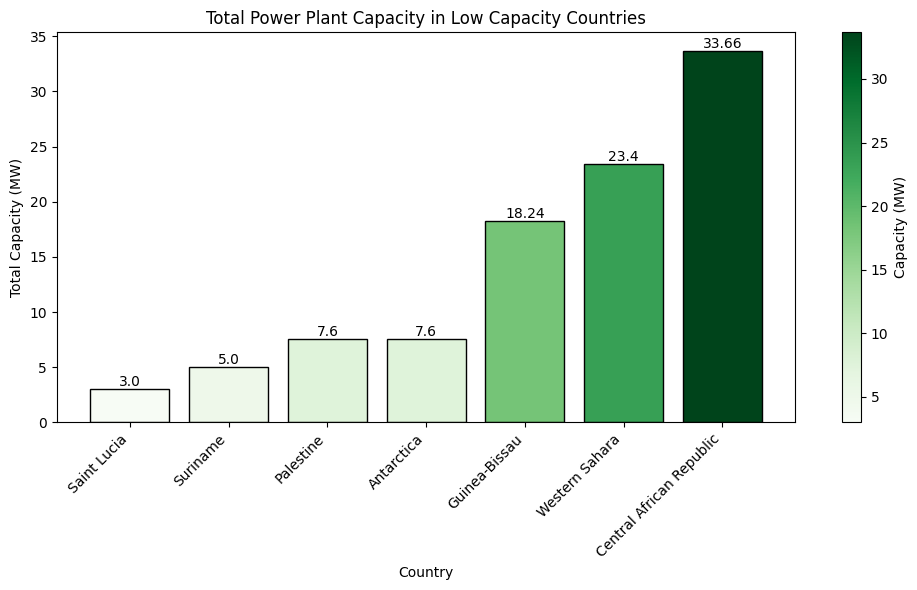

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Normalize the capacity values
norm = mcolors.Normalize(vmin=low_capacity_countries['capacity_mw'].min(), vmax=low_capacity_countries['capacity_mw'].max())

# Create a colormap (green gradient)
cmap = plt.cm.Greens

# Plot a bar chart with a green color gradient
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(low_capacity_countries['country_long'], low_capacity_countries['capacity_mw'], 
              color=cmap(norm(low_capacity_countries['capacity_mw'])), edgecolor='black')

# Create a ScalarMappable for colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Needed to avoid warning

# Add a colorbar to indicate the capacity range, explicitly passing the axes (ax) object
cbar = fig.colorbar(sm, ax=ax, label='Capacity (MW)')

# Label the values at the top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Labeling
ax.set_xlabel('Country')
ax.set_ylabel('Total Capacity (MW)')
ax.set_title('Total Power Plant Capacity in Low Capacity Countries')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


   primary_fuel  capacity_mw
0             5         33.0
1            10         10.0
2            10         10.0
3             5         66.0
4             5        100.0
primary_fuel    0
capacity_mw     0
dtype: int64
Correlation matrix:
              primary_fuel  capacity_mw
primary_fuel      1.000000    -0.295377
capacity_mw      -0.295377     1.000000


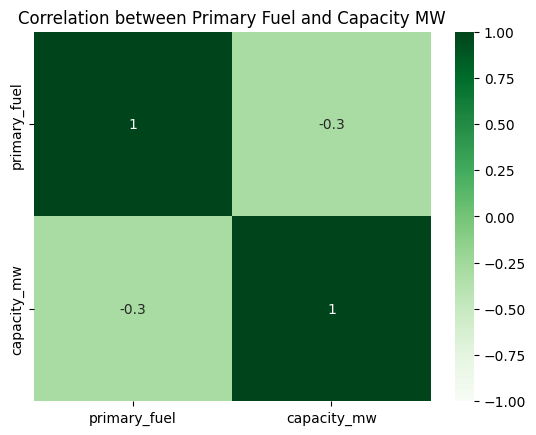

In [21]:
# Inspect the dataset and check for missing values
print(df[['primary_fuel', 'capacity_mw']].head())
print(df[['primary_fuel', 'capacity_mw']].isnull().sum())

# Handle missing values if any
df = df.dropna(subset=['primary_fuel', 'capacity_mw'])

# Encode 'Primary fuel' using label encoding
df['primary_fuel'] = df['primary_fuel'].astype('category').cat.codes

# Calculate the correlation
correlation = df[['primary_fuel', 'capacity_mw']].corr()
print("Correlation matrix:")
print(correlation)

# Visualize the correlation using a heatmap with a green gradient
sns.heatmap(correlation, annot=True, cmap='Greens', vmin=-1, vmax=1)
plt.title("Correlation between Primary Fuel and Capacity MW")
plt.show()


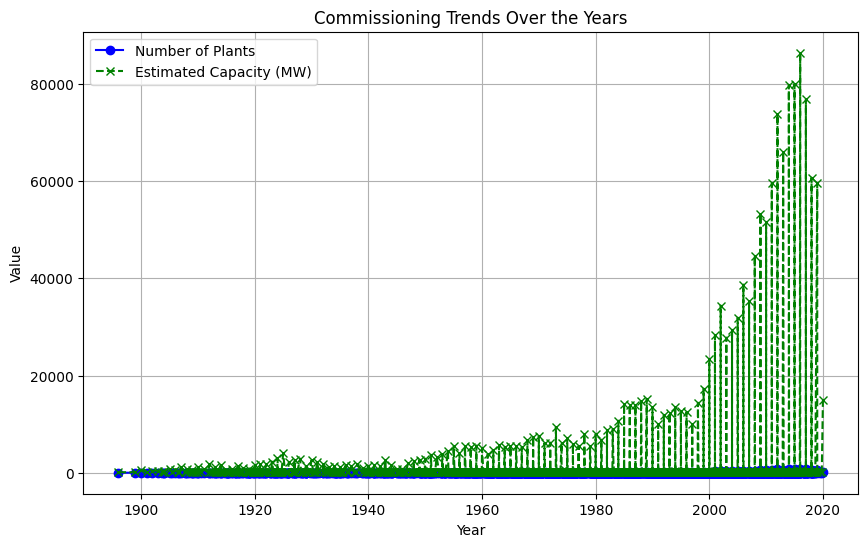

In [5]:
plants_per_year = df.groupby('commissioning_year')['name'].nunique()

capacity_per_year = plants_per_year * 100

plt.figure(figsize=(10, 6))

plt.plot(plants_per_year.index, plants_per_year.values, label='Number of Plants', color='blue', marker='o')
plt.plot(plants_per_year.index, capacity_per_year, label='Estimated Capacity (MW)', color='green', linestyle='--', marker='x')

# Adding labels and title
plt.title('Commissioning Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.grid(True)
plt.show()

In [5]:
fuel_percentages = (fuel_counts / fuel_counts.sum()) * 100
fuel_percentages

primary_fuel
Solar             30.527250
Hydro             20.483169
Wind              15.296542
Gas               11.443783
Coal               6.669338
Oil                6.640714
Biomass            4.093199
Waste              3.057019
Nuclear            0.558163
Geothermal         0.540989
Storage            0.386421
Other              0.123082
Cogeneration       0.117357
Petcoke            0.034349
Wave and Tidal     0.028624
Name: count, dtype: float64

C:\Users\Laptop Solutions\AppData\Local\Temp\ipykernel_20792\2460627915.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens', len(fuel_percentages_limited))


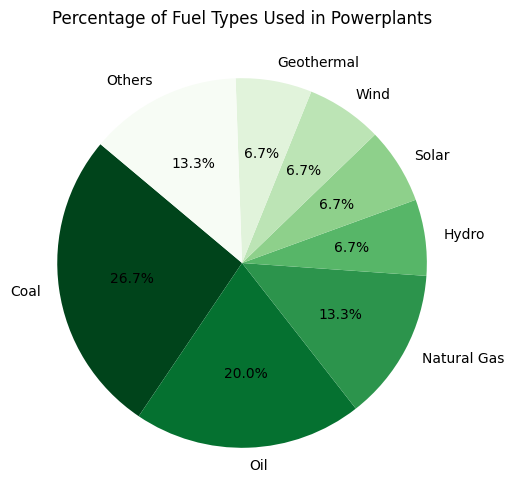

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


# Count fuel types and calculate percentages
fuel_counts = df['primary_fuel'].value_counts()
fuel_percentages = (fuel_counts / fuel_counts.sum()) * 100

# Select top 7 fuels and group the rest as 'Others'
top_fuels = fuel_percentages[:7]
others_percentage = pd.Series({'Others': fuel_percentages[7:].sum()})
fuel_percentages_limited = pd.concat([top_fuels, others_percentage])

# Generate green gradient colors (reversed for darker -> lighter)
cmap = cm.get_cmap('Greens', len(fuel_percentages_limited))
colors = [cmap(i) for i in reversed(range(len(fuel_percentages_limited)))]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    fuel_percentages_limited, 
    labels=fuel_percentages_limited.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)
plt.title('Percentage of Fuel Types Used in Powerplants')
plt.show()


C:\Users\Laptop Solutions\AppData\Local\Temp\ipykernel_20792\2209525659.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="primary_fuel", y="capacity_mw", data=df, palette="muted")


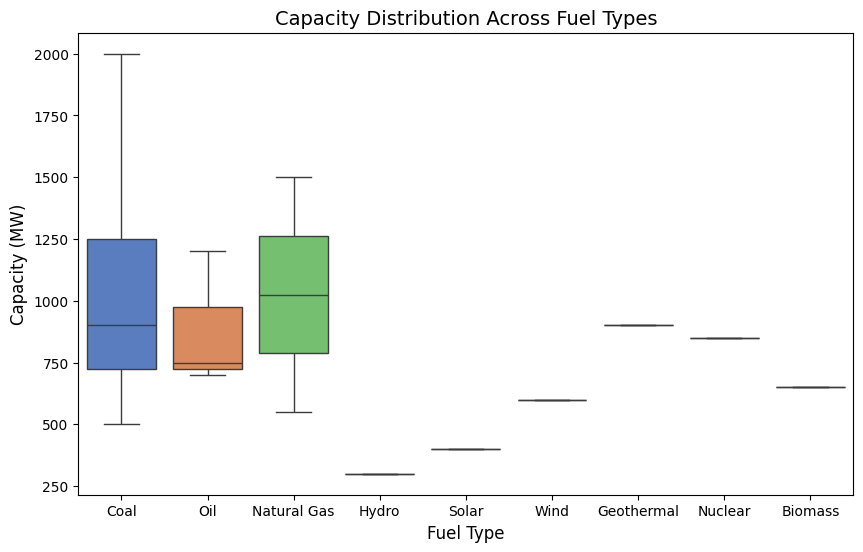

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="primary_fuel", y="capacity_mw", data=df, palette="muted")

# Add labels and title
plt.title("Capacity Distribution Across Fuel Types", fontsize=14)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Capacity (MW)", fontsize=12)

# Show the plot
plt.show()
